In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sharpening using smooth filters




> We've seen that smooth filters are used to blur and remove info from the image.
<br>
In this part your task is to do the opposite ! Use them to actually make the image sharper

- hint: $$g_{\text{sharp}} = f + \gamma \left( f - h_{\text{blur}} * f \right)$$

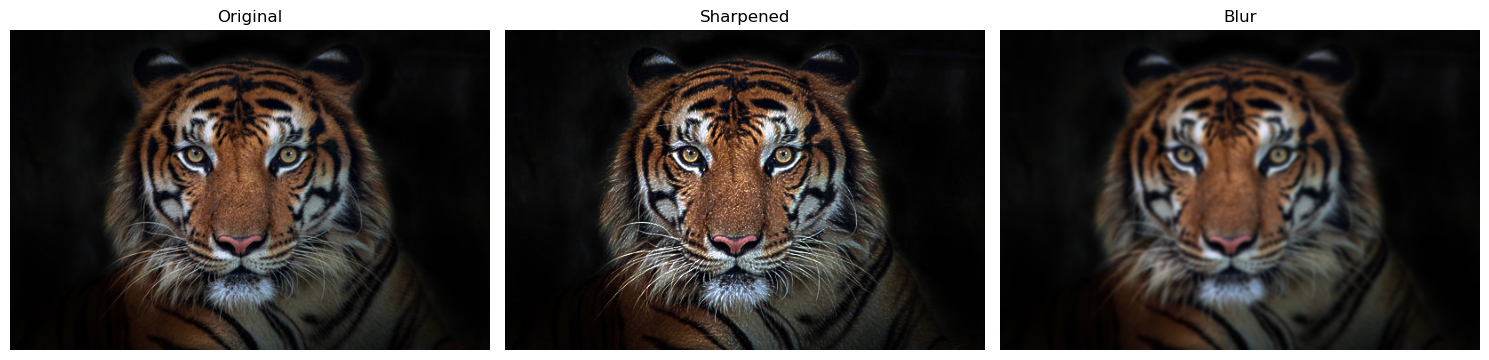

In [ ]:
def sharpen_image(image, kernel_size=(7, 7), gamma=2):

  # TODO: Apply a smoothing filter (e.g., Gaussian blur)
  gaussian_blur = cv2.GaussianBlur(image, kernel_size, 0)
  #Trying other filters 
  #box_blur = cv2.filter2D(image, -1, np.ones(kernel_size, np.float32)/49)
  #median_blur = cv2.medianBlur(image, 7)
  #bilateral_blur = cv2.bilateralFilter(image, 7, 75, 75)

  # TODO: Calculate the difference between the original and blurred image
  difference_img = cv2.subtract(image, gaussian_blur)
  #Trying other filters 
  #difference_img = cv2.subtract(image, box_blur)
  #difference_img = cv2.subtract(image, median_blur)
  #difference_img = cv2.subtract(image, bilateral_blur)


  # TODO: Apply the gamma factor
  gamma = float(gamma) # Convert gamma to float to ensure precise calculations and avoid type mismatch errors during cv2.multiply
  sharpened_detail = cv2.multiply(difference_img.astype(np.float32), gamma)

  # TODO:
  # Add the sharpened detail back to the original image
  sharpened_img = cv2.add(image.astype(np.float32), sharpened_detail)
  # Convert sharpened_detail to the same data type as the original image
  sharpened_img = np.clip(sharpened_img, 0, 255).astype(image.dtype)
  # return the sharp image and the blur one
  return sharpened_img, gaussian_blur

#Load the image
image = cv2.imread('tiger.jpg')

# Convert the image from BGR (default in OpenCV) to RGB (default in matplotlib)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Check if the image was successfully loaded
if image is not None:
  sharpened_img, blur = sharpen_image(image)
  """cv2_imshow(image)
  cv2_imshow(sharpened_img)
  cv2_imshow(blur)
  cv2.waitKey(0)
  cv2.destroyAllWindows()"""
  # Create a figure to display images with matplotlib
  plt.figure(figsize=(15, 6))

  plt.subplot(1, 3, 1)
  plt.imshow(image)
  plt.title('Original')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(sharpened_img)
  plt.title('Sharpened')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(blur)
  plt.title('Blur')
  plt.axis('off')

  plt.tight_layout()
  plt.show()
else:
  # Handle the case where the image was not loaded properly
  print("Error: Could not load image.")